**Tema seleccionado: Análisis Estadístico de Indicadores de Salud para la Predicción del Riesgo de Diabetes**

La diabetes mellitus constituye una de las principales causas de morbilidad y mortalidad a nivel mundial, con una prevalencia en constante aumento que la posiciona como un desafío crítico para los sistemas de salud pública. Su etiología multifactorial —que integra determinantes demográficos, estilos de vida, antecedentes familiares y marcadores clínicos— la convierte en un fenómeno complejo cuyo estudio demanda aproximaciones estadísticas rigurosas y multidimensionales. La identificación temprana de factores de riesgo y la caracterización de subpoblaciones vulnerables son esenciales para el diseño de intervenciones preventivas efectivas y la optimización de recursos sanitarios.

Este proyecto aborda la predicción y caracterización estadística del riesgo de diabetes mediante el estudio de registros sintéticos pero médicamente realistas, permitiendo aplicar técnicas estadísticas avanzadas del curso en un contexto de alta relevancia clínica y social.

**Preguntas de investigación:**

1. **(...)**
2. **(...)**
3. **(...)**

### Fuente de datos

Los datos fueron obtenidos del repositorio **Kaggle** en el dataset *"Diabetes Health Indicators Dataset"*:

**🔗 Enlace**: [https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset](https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset)

**📊 Características del dataset**:
- **Filas**: 100,000 registros (1 por paciente)
- **Columnas**: 35+ variables
- **Formato**: CSV limpio y preprocesado

### Categorías de variables disponibles

| Categoría | Variables principales | Ejemplo de rangos |
|-----------|----------------------|------------------|
| **Demográficas** (6) | `age`, `gender`, `ethnicity`, `education_level`, `income_level`, `employment_status` | 18-90 años, Male/Female/Other |
| **Estilo de vida** (7) | `smoking_status`, `alcohol_consumption_per_week`, `physical_activity_minutes_per_week`, `diet_score` | 0-30 bebidas/semana, 0-10 dieta |
| **Antecedentes médicos** (3) | `family_history_diabetes`, `hypertension_history`, `cardiovascular_history` | 0=No, 1=Yes |
| **Clínicas** (17) | `bmi`, `systolic_bp`, `glucose_fasting`, `hba1c`, `cholesterol_total` | BMI: 15-45, HbA1c: 4-14% |

**Variable objetivo principal**: `diagnosed_diabetes` (0=No, 1=Yes)

Los datos sintéticos preservan la privacidad mientras mantienen validez analítica, siendo ideales para los requisitos del proyecto académico.


Configuración e Importación de Librerías:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import levene, shapiro, f_oneway, f, kruskal, rankdata, chi2, chi2_contingency

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### <span style="color:#80cee1;"> Análisis Exploratorio de Datos (EDA)

Como primer paso del análisis exploratorio, se calcularon estadísticos descriptivos básicos (medidas de tendencia central y dispersión) para algunas de las variables numéricas más relevantes del conjunto de datos. 

Estos resúmenes permiten caracterizar el perfil general de la población estudiada, identificar valores típicos y rangos de variación, y detectar posibles patrones iniciales relacionados con el riesgo de diabetes antes de aplicar técnicas estadísticas más avanzadas.


In [ ]:
# Cargar el dataset
df = pd.read_csv('Diabetes_and_LifeStyle_Dataset .csv')

# Variables asociadas al estilo de vida
Lifestyle_vars = [
    "alcohol_consumption_per_week",
    "physical_activity_minutes_per_week",
    "diet_score",
    "screen_time_hours_per_day",
    "sleep_hours_per_day"
]

# Variables asociadas al estado clínico
Clinical_vars = [
    "bmi",
    "insulin_level",
    "triglycerides",
    "glucose_fasting",
    "hba1c",
    "systolic_bp",
    "diastolic_bp",
    "heart_rate",
    "cholesterol_total"
]

# Variables demográficas
Demographic_vars = [
    "Age"
]


summary = df[Clinical_vars + Lifestyle_vars + Demographic_vars].select_dtypes(include="number").agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.50),
    lambda x: x.quantile(0.75),
    'max'
]).T

summary.columns = [
    'count', 'mean', 'median', 'std',
    'min', '25%', '50%', '75%', 'max'
]

summary


,count,mean,median,std,min,25%,50%,75%,max
bmi,97297.0,25.615093,25.60,3.588387,15.0,23.20,25.60,28.00,39.20
insulin_level,97297.0,9.063591,8.79,4.956342,2.0,5.09,8.79,12.45,32.22
triglycerides,97297.0,121.466407,121.00,43.393422,30.0,91.00,121.00,151.00,344.00
glucose_fasting,97297.0,111.121792,111.00,13.590382,60.0,102.00,111.00,120.00,172.00
hba1c,97297.0,6.520338,6.52,0.813710,4.0,5.97,6.52,7.07,9.80
systolic_bp,97297.0,115.800127,116.00,14.287977,90.0,106.00,116.00,125.00,179.00
diastolic_bp,97297.0,75.233964,75.00,8.206551,50.0,70.00,75.00,81.00,110.00
heart_rate,97297.0,69.628807,70.00,8.373731,40.0,64.00,70.00,75.00,105.00
cholesterol_total,97297.0,185.984234,186.00,32.013395,100.0,164.00,186.00,208.00,318.00
alcohol_consumption_per_week,97297.0,2.004543,2.00,1.418060,0.0,1.00,2.00,3.00,10.00


El análisis descriptivo se basa en una muestra de 97,297 individuos adultos, con una edad promedio de 50.2 años (rango: 19-90 años). El perfil clínico de la población se caracteriza por valores promedio que se sitúan en rangos elevados para varios factores de riesgo metabólico y cardiovascular. El índice de masa corporal (BMI) promedio es de 25.6 kg/m², ubicándose en la categoría de sobrepeso, con una distribución que abarca desde bajo peso (15.0 kg/m²) hasta obesidad grado II (39.2 kg/m²). Los biomarcadores glucémicos revelan un estado metabólico comprometido: la glucosa en ayunas presenta una media de 111.1 mg/dL y la hemoglobina glicosilada (HbA1c) de 6.52%, ambos valores en el umbral de diagnóstico para diabetes mellitus según criterios internacionales. El perfil lipídico muestra niveles promedio de triglicéridos de 121.5 mg/dL y colesterol total de 186.0 mg/dL, considerados en el límite alto de la normalidad.

Los parámetros cardiovasculares indican una presión arterial media de 115.8/75.2 mmHg y una frecuencia cardíaca en reposo de 69.6 lpm, valores generalmente dentro de rangos normales. Sin embargo, se observa una dispersión significativa, con casos de hipertensión sistólica (máximo 179 mmHg) e hipertensión diastólica (máximo 110 mmHg). El nivel de insulina promedio es de 9.06 μU/mL, con una desviación estándar considerable (4.96), lo que sugiere una amplia variabilidad en la resistencia a la insulina entre los individuos.

Respecto a los hábitos de estilo de vida, se identifica un patrón de actividad física insuficiente, con un promedio de 118.9 minutos semanales, por debajo de las recomendaciones de 150 minutos. El tiempo de pantalla diario es elevado (6.0 horas en promedio), mientras que la duración del sueño se aproxima a lo recomendado (7.0 horas). El consumo de alcohol es moderado (2.0 bebidas/semana) y la calidad de la dieta, evaluada mediante una puntuación de 0 a 10, es media (6.0). La distribución de estos factores muestra una notable heterogeneidad, con extremos que van desde el sedentarismo absoluto (0 minutos de actividad física) hasta una actividad vigorosa (833 minutos/semana), y desde una dieta muy pobre (puntuación 0) hasta una excelente (puntuación 10).

En conjunto, los datos describen una población con una carga significativa de factores de riesgo metabólico, particularmente relacionados con la regulación de la glucosa y el peso corporal. La coexistencia de estos marcadores clínicos con estilos de vida subóptimos, especialmente en actividad física y tiempo de pantalla, refuerza la noción de un perfil de riesgo elevado.

Con el fin de complementar el análisis basado en estadísticos descriptivos y profundizar en la comprensión de la estructura de los datos, se emplearon visualizaciones clave tales como histogramas, diagramas de caja, gráficos de dispersión y mapas de calor:

### <span style="color:#3498db;">¿Cómo influyen la edad, género y etnia en el riesgo de diabetes?

##### Distribución de edad por estado de diabetes

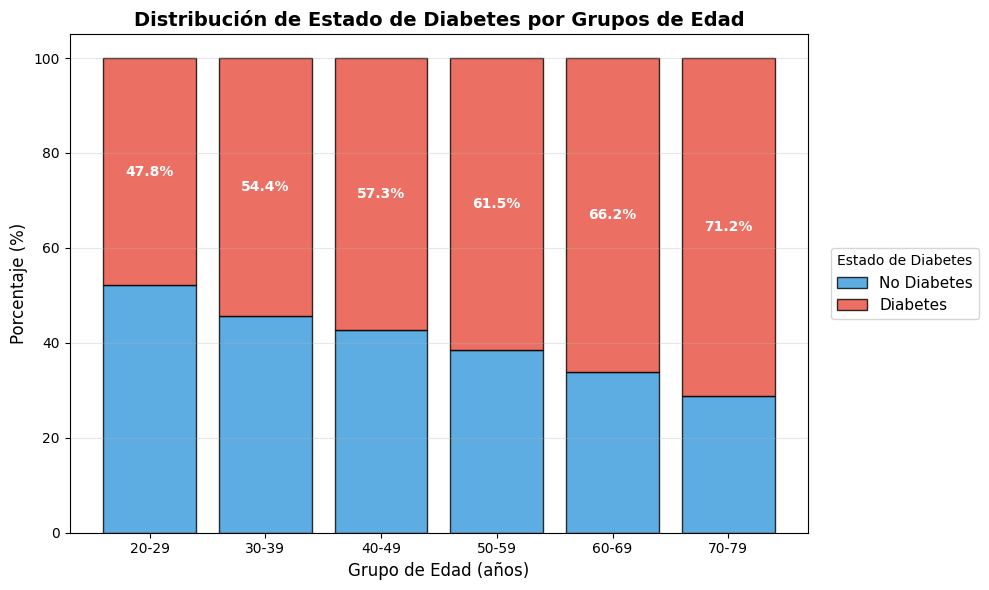

In [3]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

tabla_edad = df.groupby(['age_group', 'diagnosed_diabetes']).size().unstack()
tabla_edad_pct = tabla_edad.div(tabla_edad.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))

bottom = np.zeros(len(tabla_edad_pct))
colors = ['#3498db', '#e74c3c']

for i, (diagnosis, color) in enumerate(zip([0, 1], colors)):
    values = tabla_edad_pct[diagnosis] if diagnosis in tabla_edad_pct.columns else 0
    plt.bar(tabla_edad_pct.index, values, bottom=bottom, 
            color=color, alpha=0.8, edgecolor='black',
            label='Diabetes' if diagnosis == 1 else 'No Diabetes')
    if i == 1:  
        for j, val in enumerate(values):
            plt.text(j, bottom[j] + val/2, f'{val:.1f}%', 
                    ha='center', va='center', color='white', fontweight='bold')
    bottom += values

plt.title('Distribución de Estado de Diabetes por Grupos de Edad', 
          fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Edad (años)', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend(
    title='Estado de Diabetes',
    fontsize=11,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=True
)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

El gráfico muestra la distribución porcentual del estado de diabetes según grupos de edad. Se observa que la proporción de individuos diagnosticados con diabetes aumenta progresivamente con la edad, siendo notablemente mayor en los grupos etarios más avanzados. En los grupos más jóvenes predomina la población sin diagnóstico de diabetes, mientras que en los grupos de mayor edad la diferencia entre individuos con y sin diabetes se reduce, lo que sugiere un incremento del riesgo de diabetes asociado al envejecimiento.

##### Distribución del riesgo de diabetes por etnia

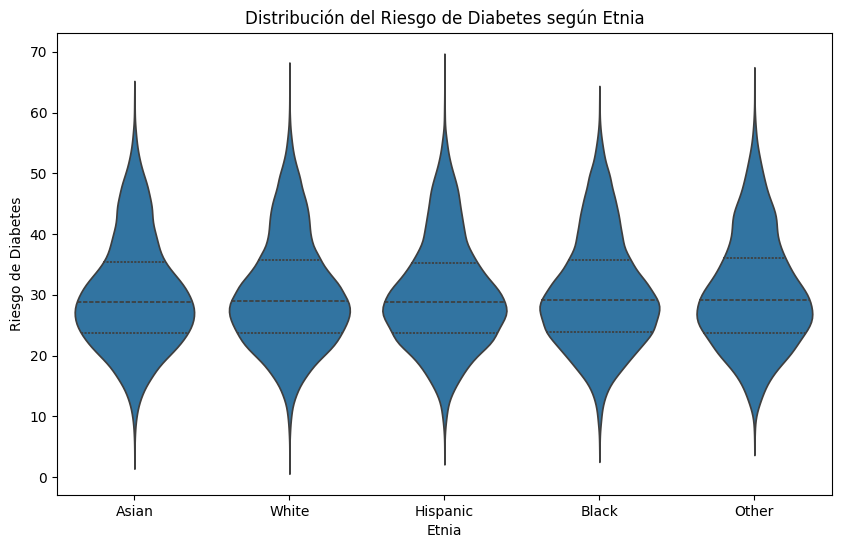

In [4]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='ethnicity',
    y='diabetes_risk_score',
    data=df,
    inner='quartile'
)
plt.title('Distribución del Riesgo de Diabetes según Etnia')
plt.xlabel('Etnia')
plt.ylabel('Riesgo de Diabetes')
plt.show()

El diagrama de violín indica que la distribución del puntaje de riesgo de diabetes es ampliamente similar entre los distintos grupos étnicos incluidos en el conjunto de datos. Si bien se observan ligeras variaciones en las medianas y en la dispersión de los valores entre etnias, estas diferencias son relativamente pequeñas en comparación con la variabilidad interna de cada grupo. En conjunto, los resultados sugieren que, dentro de esta muestra, la etnia no muestra una asociación fuerte con el riesgo de diabetes, y que la variabilidad del riesgo está predominantemente influenciada por factores individuales más que por la pertenencia étnica.

##### Riesgo medio de diabetes por grupo de edad y género

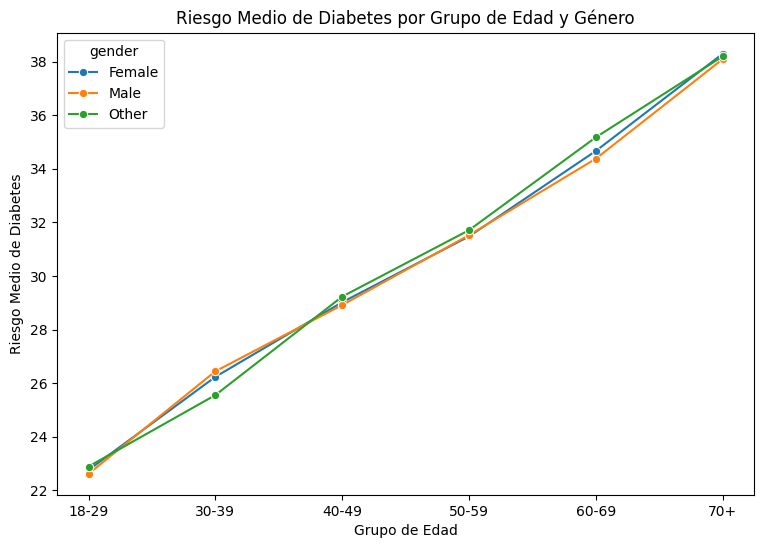

In [5]:
df_plot = df[['Age', 'gender', 'diabetes_risk_score']].dropna()

df_plot['age_group'] = pd.cut(
    df_plot['Age'],
    bins=[18, 30, 40, 50, 60, 70, 90],
    labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
)

# Calcular riesgo medio
risk_by_age_gender = (
    df_plot
    .groupby(['age_group', 'gender'])['diabetes_risk_score']
    .mean()
    .reset_index()
)

# Gráfica
plt.figure(figsize=(9, 6))
sns.lineplot(
    data=risk_by_age_gender,
    x='age_group',
    y='diabetes_risk_score',
    hue='gender',
    marker='o'
)

plt.title('Riesgo Medio de Diabetes por Grupo de Edad y Género')
plt.xlabel('Grupo de Edad')
plt.ylabel('Riesgo Medio de Diabetes')
plt.show()

El riesgo medio de diabetes aumenta con la edad en todos los géneros. Las diferencias entre mujeres y hombres son moderadas, mientras que el grupo “otro” muestra mayor variabilidad debido a un menor número de observaciones.

### <span style="color:#3498db;"> ¿Qué influencia pueden tener los antecedentes familiares en el riesgo de diabetes?

##### Riesgo de diabetes según antecedentes familiares

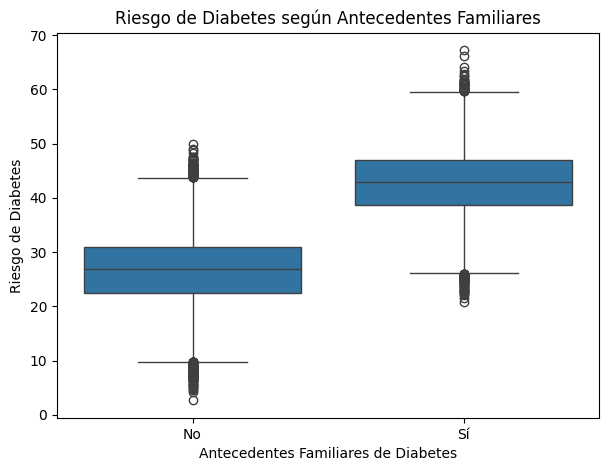

In [6]:
df_plot = df[['family_history_diabetes', 'diabetes_risk_score']].dropna()

df_plot['family_history_diabetes'] = df_plot['family_history_diabetes'].map({
    0: 'No',
    1: 'Sí'
})

plt.figure(figsize=(7, 5))
sns.boxplot(
    data=df_plot,
    x='family_history_diabetes',
    y='diabetes_risk_score'
)

plt.title('Riesgo de Diabetes según Antecedentes Familiares')
plt.xlabel('Antecedentes Familiares de Diabetes')
plt.ylabel('Riesgo de Diabetes')
plt.show()

A partir del gráfico se concluye que la presencia de antecedentes familiares de diabetes está asociada con un mayor riesgo de desarrollar la enfermedad.
Las personas con antecedentes no solo presentan valores medianos de riesgo más elevados, sino también una mayor variabilidad y una mayor proporción de casos con riesgo alto.La presencia de valores atípicos en ambos grupos indica que, si bien los antecedentes familiares influyen significativamente en el riesgo de diabetes, no son el único factor determinante. Existen individuos sin antecedentes que presentan un riesgo elevado, así como individuos con antecedentes cuyo riesgo es bajo.

### <span style="color:#3498db;">¿Cómo se relaciona el riesgo de diabetes con los factores de estilo de vida y la antropometría?

##### Tendencia del riesgo de diabetes según el índice de masa corporal

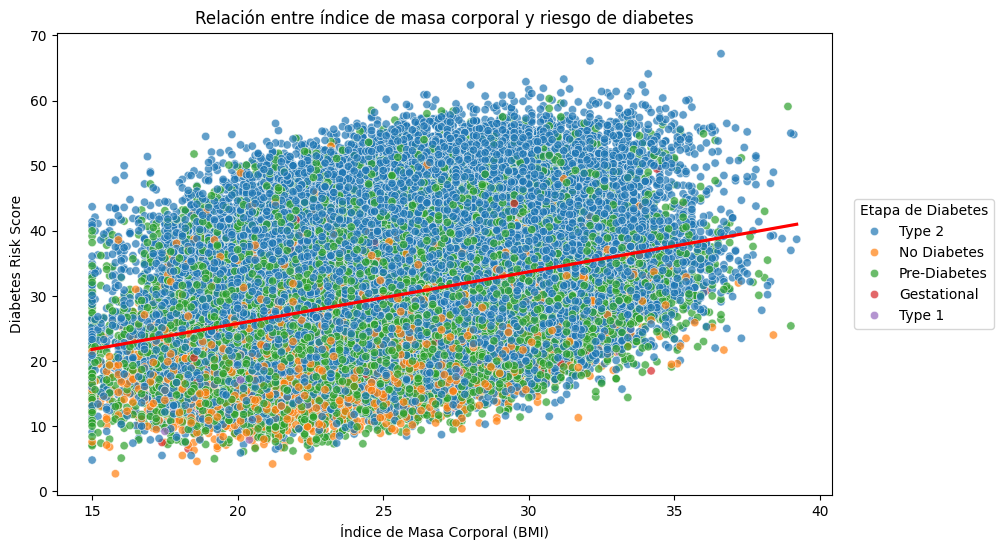

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='bmi', y='diabetes_risk_score', hue='diabetes_stage', alpha=0.7)
sns.regplot(data=df, x='bmi', y='diabetes_risk_score', scatter=False, color='red') 

plt.title('Relación entre índice de masa corporal y riesgo de diabetes')
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Diabetes Risk Score')
plt.legend(title='Etapa de Diabetes',loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=True)
plt.show()

El gráfico muestra que el riesgo de diabetes tiende a aumentar a medida que se incrementa el índice de masa corporal, una relación confirmada por la línea de regresión roja, que indica que las personas con mayor IMC presentan un riesgo más alto. Esta tendencia es consistente y clara. Sin embargo, dentro de cada rango de IMC existe dispersión: algunas personas con IMC normal presentan riesgo elevado, mientras que algunas con IMC alto tienen riesgo moderado, lo que sugiere que otros factores también influyen en el riesgo de diabetes. Además, al diferenciar por etapa de diabetes, se observa que las personas en etapas avanzadas se concentran en la zona superior derecha del gráfico (IMC alto y riesgo elevado), mientras que aquellas en etapas iniciales o sin diagnóstico están más dispersas, cubriendo principalmente rangos bajos y medios de IMC y riesgo.

##### Tendencia del riesgo de diabetes según los minutos de actividad física por semana

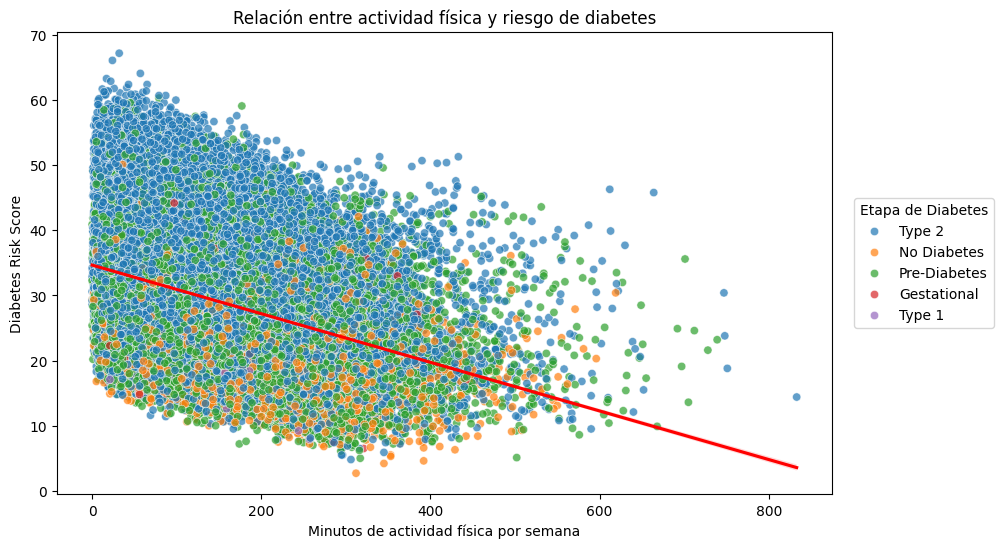

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='physical_activity_minutes_per_week', 
    y='diabetes_risk_score', 
    hue='diabetes_stage', 
    alpha=0.7
)
sns.regplot(
    data=df, 
    x='physical_activity_minutes_per_week', 
    y='diabetes_risk_score', 
    scatter=False, 
    color='red'
)

plt.title('Relación entre actividad física y riesgo de diabetes')
plt.xlabel('Minutos de actividad física por semana')
plt.ylabel('Diabetes Risk Score')
plt.legend(title='Etapa de Diabetes',loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=True)
plt.show()

El gráfico muestra que a mayor actividad física semanal, el riesgo de diabetes tiende a disminuir, confirmando la relación negativa observada en la línea de regresión. Sin embargo, hay variabilidad: algunas personas con poca actividad presentan riesgo moderado o bajo, y algunas con alta actividad muestran riesgo relativamente alto, indicando que otros factores como peso, genética y alimentación también influyen. Las etapas avanzadas de diabetes se concentran en individuos con menor actividad y mayor riesgo, mientras que los casos tempranos o sin diagnóstico presentan menor riesgo y mayor dispersión en la actividad física.

##### Riesgo promedio de diabetes según índice de masa corporal y actividad física

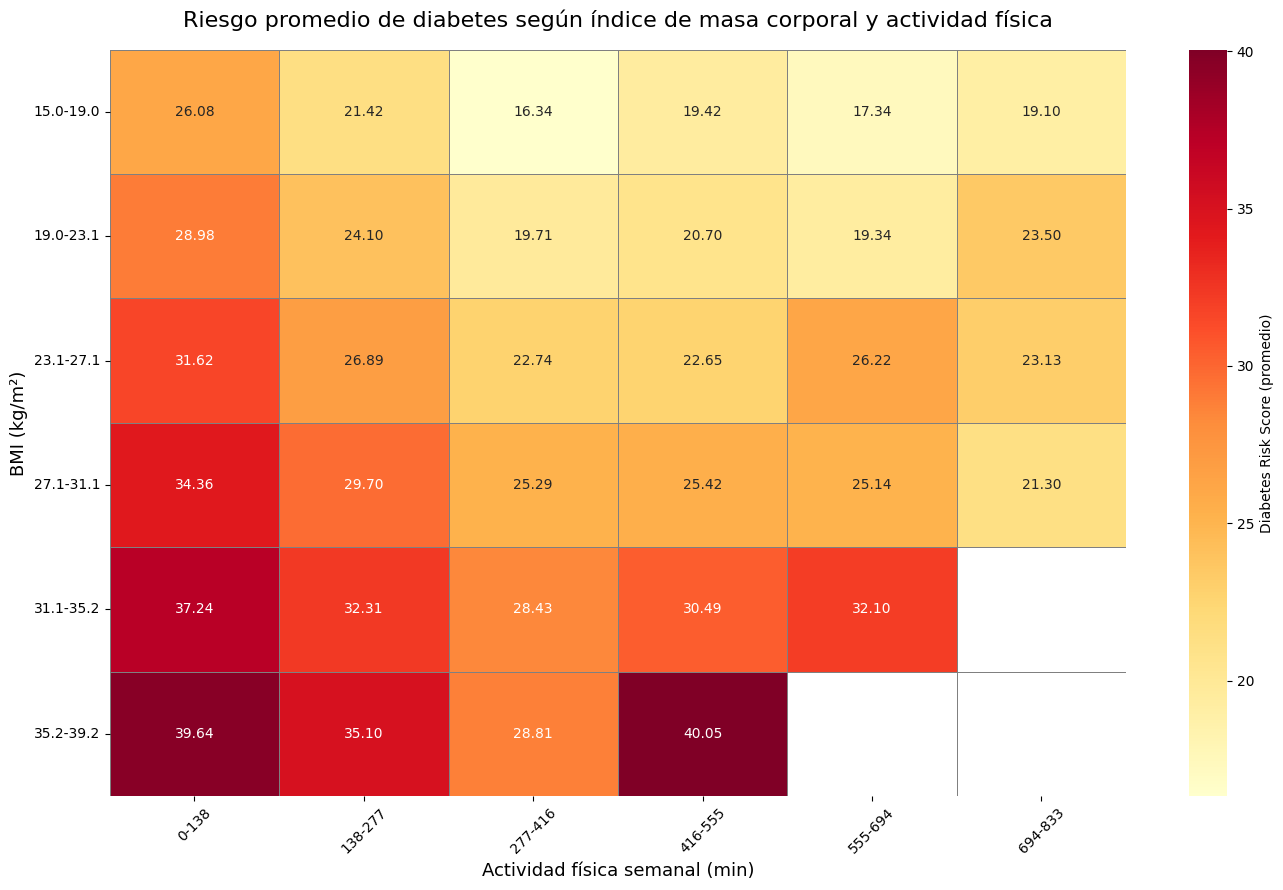

In [9]:
n_activity_bins = 6
n_bmi_bins = 6
figsize = (14,9)

#  intervalos de actividad fisica
activity_edges = np.linspace(
    df['physical_activity_minutes_per_week'].min(),
    df['physical_activity_minutes_per_week'].max(),
    n_activity_bins + 1
)

activity_labels = [
    f"{int(activity_edges[i])}-{int(activity_edges[i+1])}"
    for i in range(len(activity_edges)-1)
]

df['activity_bin'] = pd.cut(
    df['physical_activity_minutes_per_week'],
    bins=activity_edges,
    labels=activity_labels,
    include_lowest=True
)

# intervalos de indice de masa corporal
bmi_edges = np.linspace(
    df['bmi'].min(),
    df['bmi'].max(),
    n_bmi_bins + 1
)

bmi_labels = [
    f"{bmi_edges[i]:.1f}-{bmi_edges[i+1]:.1f}"
    for i in range(len(bmi_edges)-1)
]

df['bmi_bin'] = pd.cut(
    df['bmi'],
    bins=bmi_edges,
    labels=bmi_labels,
    include_lowest=True
)

pivot_risk = pd.pivot_table(
    df,
    index='bmi_bin',
    columns='activity_bin',
    values='diabetes_risk_score',
    aggfunc='mean'
)

plt.figure(figsize=figsize)

sns.heatmap(
    pivot_risk,
    annot=True,
    fmt='.2f',
    cmap='YlOrRd',
    cbar_kws={'label': 'Diabetes Risk Score (promedio)'},
    linewidths=0.6,
    linecolor='gray'
)

plt.title(
    'Riesgo promedio de diabetes según índice de masa corporal y actividad física',
    fontsize=16,
    pad=16
)

plt.xlabel('Actividad física semanal (min)', fontsize=13)
plt.ylabel('BMI (kg/m²)', fontsize=13)

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


En el mapa de calor se observa que las celdas correspondientes a IMC más alto y menor actividad física presentan los valores de riesgo más elevados, mientras que los individuos con IMC más bajo y mayor actividad física presentan riesgo más bajo. Esto confirma la interacción entre estos dos factores de estilo de vida y antropométricos: tanto un mayor peso como la baja actividad física se asocian con un incremento del riesgo de diabetes. La visualización también permite identificar áreas intermedias donde el riesgo es moderado, reflejando que otros factores adicionales pueden influir en el riesgo dentro de cada combinación de IMC y actividad física.

##### Relación del riesgo de diabetes con las dietas

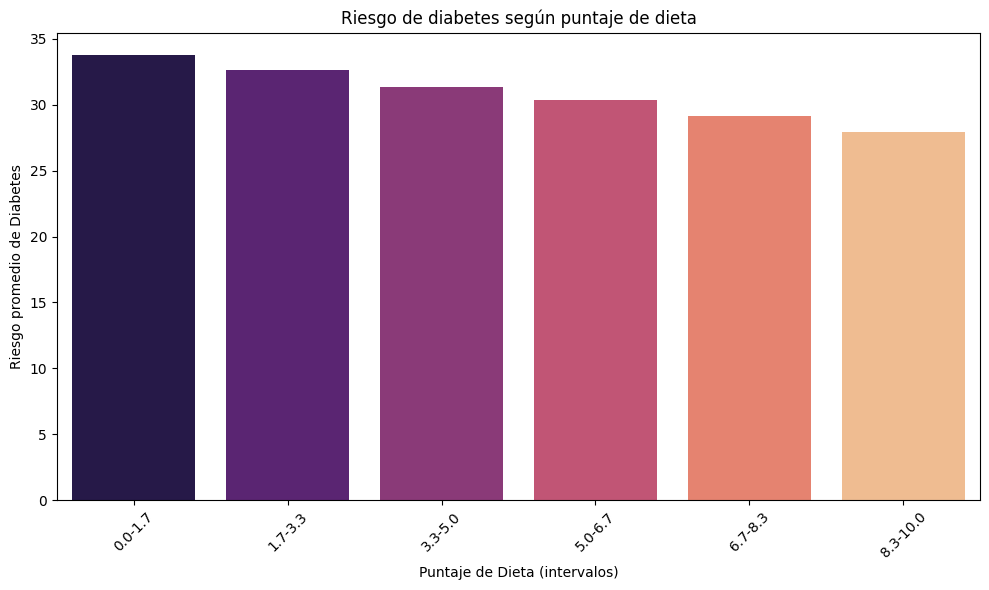

In [10]:
df_plot = df.copy()
df_plot['diet_score'] = df_plot['diet_score'].fillna(df_plot['diet_score'].mean())
df_plot['diabetes_risk_score'] = df_plot['diabetes_risk_score'].fillna(df_plot['diabetes_risk_score'].mean())

n_bins = 6
diet_bins = np.linspace(df_plot['diet_score'].min(), df_plot['diet_score'].max(), n_bins + 1)
diet_labels = [f"{diet_bins[i]:.1f}-{diet_bins[i+1]:.1f}" for i in range(n_bins)]
df_plot['diet_bin'] = pd.cut(df_plot['diet_score'], bins=diet_bins, labels=diet_labels, include_lowest=True)

risk_by_diet = df_plot.groupby('diet_bin')['diabetes_risk_score'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=risk_by_diet,
    x='diet_bin',
    y='diabetes_risk_score',
    palette='magma'
)

plt.xlabel('Puntaje de Dieta (intervalos)')
plt.ylabel('Riesgo promedio de Diabetes')
plt.title('Riesgo de diabetes según puntaje de dieta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico muestra que a medida que aumenta el puntaje de dieta, el riesgo de diabetes tiende a disminuir. Aunque la magnitud del efecto es relativamente débil, la tendencia es consistente a lo largo de los intervalos de dieta.

##### Tendencia de riesgo de diabetes según tabaquismo

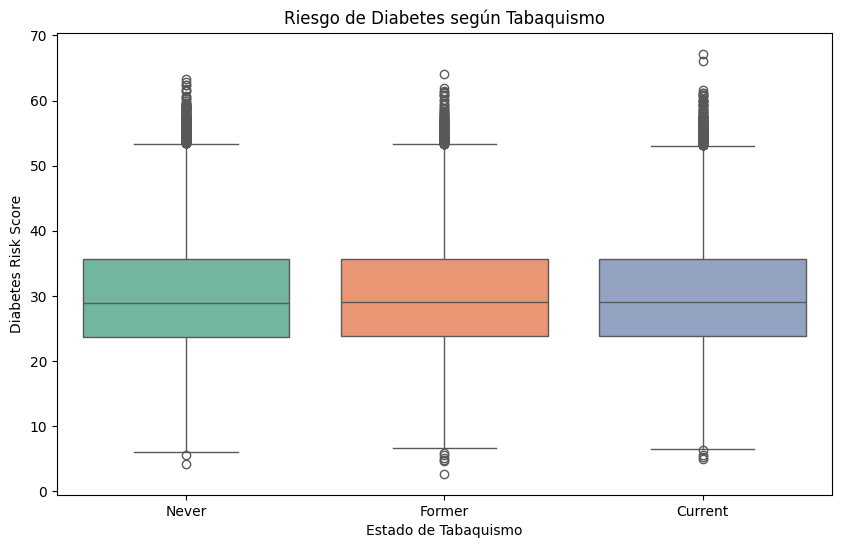

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='smoking_status', y='diabetes_risk_score', palette='Set2')
plt.title('Riesgo de Diabetes según Tabaquismo')
plt.xlabel('Estado de Tabaquismo')
plt.ylabel('Diabetes Risk Score')
plt.show()

El gráfico de cajas y bigotes muestra que las medianas del riesgo de diabetes son muy similares entre los tres grupos de tabaquismo: nunca, antiguo y actual. Se observan valores atípicos altos en todos los grupos, lo que indica que el riesgo elevado de diabetes no es exclusivo de un estado particular de tabaquismo. Visualmente, no se aprecia una separación clara entre fumadores actuales, exfumadores y personas que nunca han fumado, sugiriendo que, dentro de esta muestra, el estado de tabaquismo no presenta una asociación evidente con el riesgo promedio de diabetes.


##### Tendencia del riesgo de diabetes según consumo de alcohol

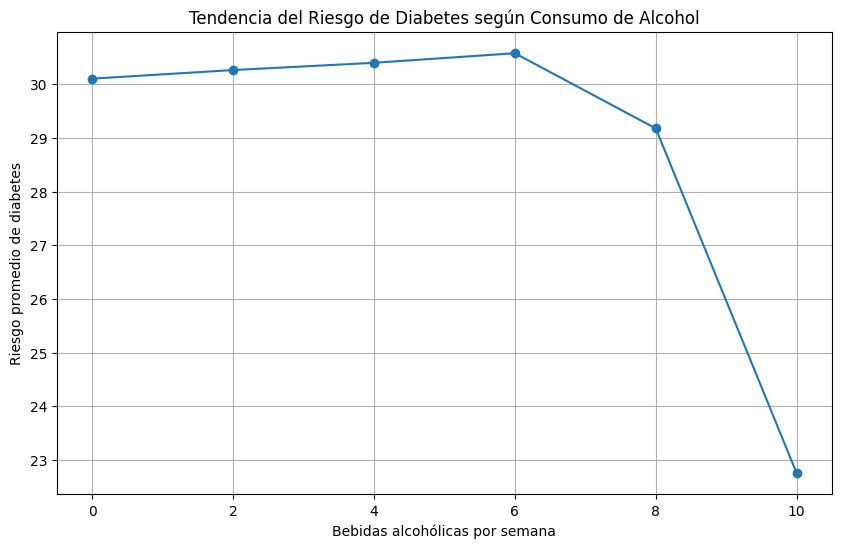

In [12]:
df['alcohol_group'] = (df['alcohol_consumption_per_week'] // 2) * 2

alcohol_line = (
    df.groupby('alcohol_group')['diabetes_risk_score']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
plt.plot(
    alcohol_line['alcohol_group'],
    alcohol_line['diabetes_risk_score'],
    marker='o'
)

plt.title('Tendencia del Riesgo de Diabetes según Consumo de Alcohol')
plt.xlabel('Bebidas alcohólicas por semana')
plt.ylabel('Riesgo promedio de diabetes')
plt.grid(True)
plt.show()

El gráfico muestra que el riesgo promedio de diabetes se mantiene prácticamente estable entre 0 y 6 bebidas alcohólicas por semana, con un leve incremento apenas perceptible. A partir de consumos más altos, la tendencia presenta fluctuaciones, incluyendo una caída pronunciada en el último intervalo. La ausencia de un patrón claro y consistente sugiere que, dentro de esta muestra, no existe una relación lineal fuerte entre el consumo de alcohol y el riesgo de diabetes, indicando que otros factores probablemente influyen más significativamente en el riesgo individual.

##### Riesgo de diabetes según historial médico

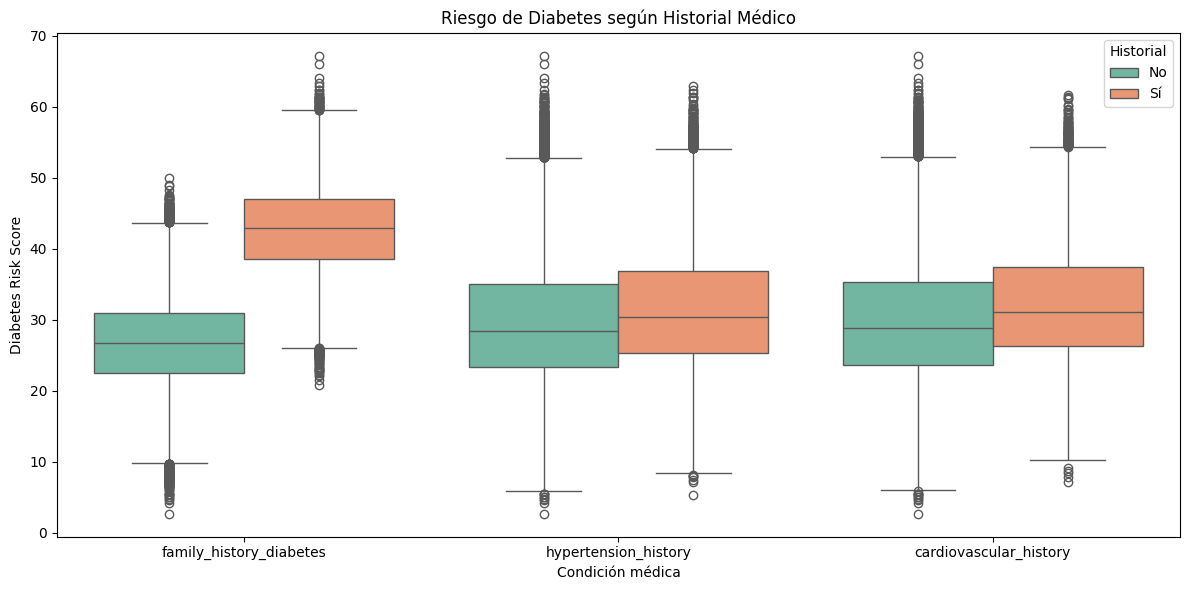

In [13]:
medical_vars = [ 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', ] 
df_medical = df.melt( value_vars=medical_vars, value_name='Historial', var_name='Condición' ) 
df_medical['diabetes_risk_score'] = pd.concat( [df['diabetes_risk_score']] * len(medical_vars), ignore_index=True )
plt.figure(figsize=(12,6))

ax = sns.boxplot(
    data=df_medical,
    x='Condición',
    y='diabetes_risk_score',
    hue='Historial',
    palette='Set2' 
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['No', 'Sí'], title='Historial')

plt.title('Riesgo de Diabetes según Historial Médico')
plt.xlabel('Condición médica')
plt.ylabel('Diabetes Risk Score')
plt.tight_layout()
plt.show()


El gráfico de cajas y bigotes muestra el riesgo de diabetes según la presencia o ausencia de antecedentes médicos: familiar, hipertensión y enfermedades cardiovasculares. Se observa que los individuos con antecedentes positivos (“Sí”) tienden a presentar un riesgo de diabetes promedio más elevado en comparación con aquellos sin dichos antecedentes (“No”), especialmente en antecedentes familiares de diabetes.

##### ¿Cómo se relacionan la presión arterial y la frecuencia cardíaca según la etapa de diabetes?

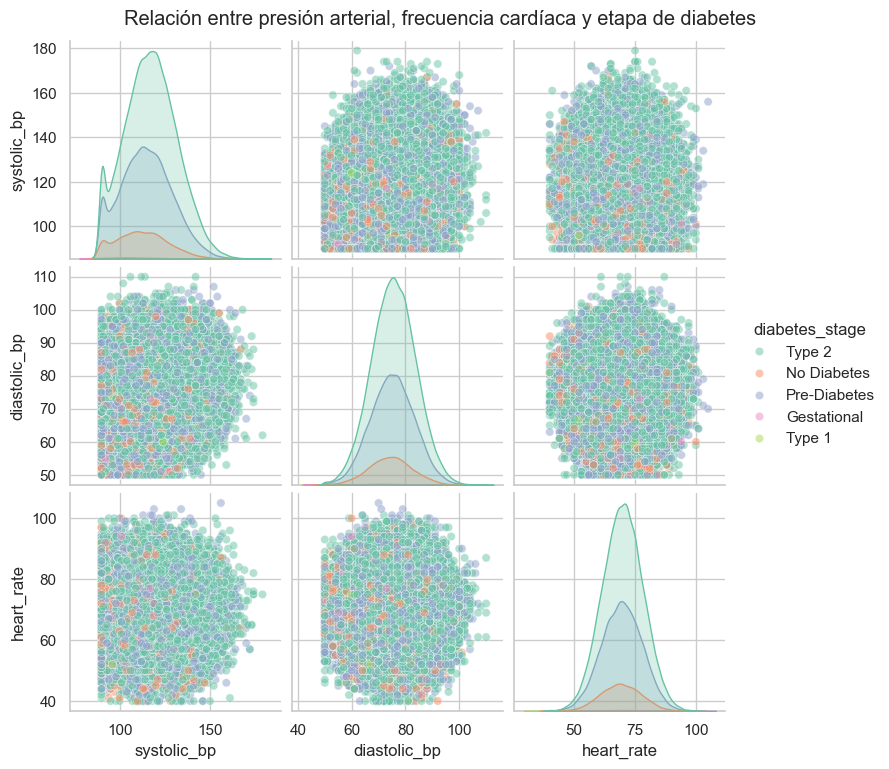

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las columnas de interés
df_plot = df[['systolic_bp', 'diastolic_bp', 'heart_rate', 'diabetes_stage']].dropna()

# Gráfico tipo pairplot
sns.set(style="whitegrid")
sns.pairplot(
    df_plot,
    hue='diabetes_stage',          # colorea según la etapa de diabetes
    diag_kind='kde',               # densidad en la diagonal
    palette='Set2',
    plot_kws={'alpha':0.5}         # transparencia para ver densidad
)
plt.suptitle("Relación entre presión arterial, frecuencia cardíaca y etapa de diabetes", y=1.02)
plt.show()


**Estructura general del gráfico:**
1. Filas y columnas: representan las variables continuas (systolic_bp, diastolic_bp, heart_rate).

2. Diagonal: muestra la distribución de cada variable por categoría (diabetes_stage).

3. Fuera de la diagonal: cada celda es un scatterplot que cruza dos variables. Cada punto representa un individuo. Los colores indican la categoría de diabetes_stage.

Como se evidencia fuera de la diagonal, los puntos están muy dispersos, lo que indica que no hay una relación lineal fuerte entre ambas variables.

### <span style="color:#80cee1;"> Aplicación de Técnicas Estadísticas

En esta sección se aplican técnicas estadísticas inferenciales y multivariadas con el fin de dar respuesta a las preguntas de investigación planteadas. La selección de cada método se realiza en función del tipo de variables analizadas y del objetivo específico de cada estudio.

### <span style="color:#3498db;"> ¿Existen diferencias significativas en el riesgo promedio de diabetes entre los tres grupo de géneros: hombre, mujer y otro?

**Objetivo del análisis**

El objetivo de este análisis es determinar si existen diferencias estadísticamente significativas en el riesgo de diabetes entre los distintos grupos de género presentes en la muestra (hombre, mujer y otro). Identificar posibles diferencias asociadas al género resulta relevante para orientar estrategias de prevención, detección temprana y diseño de políticas de salud pública enfocadas en poblaciones específicas. Para ello utilizaremos el m[etodo de Kruskal-Wallis.]

**Justificación del uso de la prueba de Kruskal–Wallis**

La prueba de Kruskal–Wallis es un método no paramétrico utilizado para comparar grupos independientes cuando no se cumplen los supuestos de normalidad o homogeneidad de varianzas requeridos por pruebas paramétricas como el ANOVA.

En este estudio, el uso de esta prueba está justificado por las siguientes razones:

1. La variable dependiente, riesgo de diabetes (diabetes_risk_score), es una medida continua que puede presentar asimetría o valores atípicos.

2. La variable independiente, género, es categórica con tres grupos independientes.

3. No existe una distribución normal del riesgo de diabetes dentro de cada grupo.

4. La prueba de Kruskal–Wallis es robusta frente a distribuciones no normales y tamaños de muestra desiguales.

Por estas razones, esta prueba constituye una herramienta estadística adecuada y confiable para evaluar diferencias entre los grupos de género en este contexto.

**Hipótesis estadísticas**

Hipótesis nula (H₀): Las distribuciones del riesgo de diabetes son iguales para los tres grupos de géneros.

Hipótesis alternativa (H₁): Al menos uno de los grupos presenta una distribución diferente.

Comprobacion de que no se cumple la normalidad utilizando el metodo Shapiro-Wilk

In [15]:
# Grupos
groups = ['Male', 'Female', 'Other']

# Revisar normalidad con Shapiro-Wilk
normality_results = {}

for g in groups:
    data = df[df['gender'] == g]['diabetes_risk_score'].dropna()
    stat, p = shapiro(data)
    normality_results[g] = (stat, p)

for g, (stat, p) in normality_results.items():
    if p < 0.05:
        print(f"El grupo {g} no cumple normalidad")
    else:
        print(f"El grupo {g} cumple normalidad")

El grupo Male no cumple normalidad
El grupo Female no cumple normalidad
El grupo Other no cumple normalidad


In [16]:
# Definición de los grupos independientes
data_groups = [df[df['gender'] == g]['diabetes_risk_score'].dropna() for g in groups]

for g, data in zip(groups, data_groups):
    print(f"{g}: n = {len(data)}")

# Combinación de todas las observaciones
all_data = np.concatenate(data_groups)
# Asignación de rangos
ranks = rankdata(all_data) 

# Redistribución de rangos por grupo
start = 0
ranked_groups = []
for i, data in enumerate(data_groups):
    n = len(data)
    ranked_groups.append(ranks[start:start+n])
    start += n

for g, r in zip(groups, ranked_groups):
    print(f"Suma de rangos para {g}:", np.sum(r))


#calcular estadístico H de Kruskal-Wallis
# Fórmula:
#
#            12
# H = ----------------- * Σ (R_i² / n_i) − 3(N + 1)
#        N (N + 1)
# donde:
# - k   = número de grupos
# - n_i = tamaño del grupo i
# - R_i = suma de rangos del grupo i
# - N   = tamaño total de la muestra
#
# Bajo la hipótesis nula, H sigue aproximadamente una
# distribución chi-cuadrado con (k − 1) grados de libertad.

print("\nCálculo del estadístico H de Kruskal-Wallis:")
k = len(groups)
n_i = [len(g) for g in data_groups]
N = sum(n_i)
R_i = [np.sum(r) for r in ranked_groups]

H = (12/(N*(N+1))) * sum(R_i[i]**2 / n_i[i] for i in range(k)) - 3*(N+1)
print(f"\nEstadístico H = {H:.4f}")


Male: n = 46460
Female: n = 48873
Other: n = 1964
Suma de rangos para Male: 2261529067.0
Suma de rangos para Female: 2376645876.5
Suma de rangos para Other: 95226809.5

Cálculo del estadístico H de Kruskal-Wallis:

Estadístico H = 0.1366


Determinacion de region de confianza:

Distribución de referencia: χ² con k-1 grados de libertad.

Grados de libertad: df = k - 1 = 2

Nivel de significancia: α = 0.05

In [17]:
df_ = k-1
chi2_crit = chi2.ppf(0.95, df_)
print(f"Región de rechazo: H > {chi2_crit:.4f}")
print("Si H > χ² crítico → Rechazamos H₀.")
print("Si H ≤ χ² crítico → No rechazamos H₀.")

Región de rechazo: H > 5.9915
Si H > χ² crítico → Rechazamos H₀.
Si H ≤ χ² crítico → No rechazamos H₀.


Dado que el valor del estadístico H es considerablemente menor que el valor crítico de la distribución chi-cuadrado, no se rechaza la hipótesis nula.
##### Conclusión del análisis

Los resultados del análisis indican que no existen diferencias estadísticamente significativas en el riesgo de diabetes entre los distintos grupos de género en la muestra analizada, al nivel de significancia del 5%. Esto sugiere que, dentro de este conjunto de datos, el género no parece ser un factor determinante en la variación del riesgo promedio de diabetes.

### <span style="color:#3498db;"> ¿El tabaquismo influye en la etapa de la diabetes?

**Objetivo del análisis:** 

El objetivo de esta prueba es evaluar si existe una asociación estadísticamente significativa entre la etapa de la diabetes y el estado de tabaquismo. Determinar esta relación es fundamental para comprender el impacto del tabaquismo en la progresión de la diabetes y para orientar intervenciones preventivas y clínicas.

**Justificación del uso de la prueba Chi-cuadrado de independencia:**

La prueba Chi-cuadrado de independencia se utiliza para evaluar si existe una relación estadísticamente significativa entre dos variables categóricas. En el presente estudio, esta prueba resulta metodológicamente adecuada debido a las características de las variables analizadas y al objetivo planteado.

En primer lugar, ambas variables de interés (la etapa de la diabetes y el estado de tabaquismo) son variables cualitativas categóricas, lo cual cumple con el requisito fundamental para la aplicación de esta prueba. La etapa de la diabetes clasifica a los individuos según el grado de progresión de la enfermedad, mientras que el tabaquismo categoriza el hábito de consumo de tabaco.

En segundo lugar, el objetivo del análisis no es comparar medias ni distribuciones, sino evaluar la existencia de una asociación o dependencia entre las dos variables. La prueba Chi-cuadrado permite contrastar las frecuencias observadas con las frecuencias esperadas bajo el supuesto de independencia, lo que la convierte en una herramienta adecuada para responder a esta pregunta de investigación.

Asimismo, la prueba asume la independencia de las observaciones, condición que se cumple al tratarse de registros individuales correspondientes a distintos sujetos. Además, se verifica el cumplimiento del supuesto de frecuencias esperadas mínimas, garantizando la validez de la aproximación de la distribución chi-cuadrado.

**Hipótesis Estadistica**

Hipótesis nula (H₀): Las variables son independientes (no hay asociación)

Hipótesis alternativa (H₁): Hay asociación entre las variables


In [18]:
# Tabla de contingencia: diabetes_stage vs smoking_status
# La tabla de contingencia resume el número de individuos
# en cada combinación de categorías:
# - Filas: etapa de la diabetes
# - Columnas: estado de tabaquismo

contingency_table = pd.crosstab(df['diabetes_stage'], df['smoking_status'])
print(contingency_table)

#  Cálculo del estadístico Chi-cuadrado
# La función chi2_contingency() calcula:
# - χ²: estadístico de prueba
# - p-value: probabilidad asociada
# - dof: grados de libertad
# - expected: frecuencias esperadas bajo H₀
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi2 = {chi2_stat:.3f}, p = {p_val:.4f}, dof = {dof}")

# Conclusión
if p_val < 0.05:
    print("Conclusión: Hay asociación significativa entre las variables")
else:
    print("Conclusión: No hay evidencia de asociación significativa")

smoking_status  Current  Former  Never
diabetes_stage                        
Gestational          57      49    161
No Diabetes        1574    1546   4617
Pre-Diabetes       6237    6191  18585
Type 1               19      25     73
Type 2            11704   11677  34782

Chi2 = 2.105, p = 0.9776, dof = 8
Conclusión: No hay evidencia de asociación significativa


**Conclusión del análisis**
Con base en los resultados de la prueba Chi-cuadrado de independencia, no se encontró evidencia estadísticamente significativa de asociación entre la etapa de la diabetes y el estado de tabaquismo, al nivel de significancia α = 0.05. En consecuencia, no se rechaza la hipótesis nula, lo que indica que, en la muestra analizada, ambas variables se comportan de manera independiente.

### <span style="color:#3498db;"> ¿Existen diferencias significativas en el índice de masa corporal promedio entre las distintas etapas de la diabetes?

**Objetivo del Análisis:**
Este análisis busca determinar si el IMC varía sistemáticamente a medida que cambia la etapa de la diabetes, lo que permitiría identificar si el peso corporal constituye un factor diferenciador en la progresión de la enfermedad. Los resultados obtenidos aportan evidencia empírica relevante para comprender el papel del IMC en el contexto de la diabetes y para orientar decisiones clínicas y estrategias de prevención basadas en el control del peso y otros factores de riesgo metabólico.

**Justificación del uso de la prueba ANOVA:**

La prueba ANOVA de una vía se utiliza para comparar las medias de una variable continua entre tres o más grupos independientes definidos por una variable categórica.

En este estudio, el uso de ANOVA está justificado porque:

1. La variable dependiente, índice de masa corporal (BMI), es cuantitativa continua.

2. La variable independiente, etapa de diabetes (diabetes_stage), es categórica con múltiples niveles.

3. El objetivo del análisis es comparar medias, no asociaciones ni distribuciones.

4. Se evalúa el cumplimiento de los supuestos de normalidad y homogeneidad de varianzas, garantizando la validez del método.

Por estas razones, el ANOVA de una vía es el procedimiento estadístico más adecuado para responder a la pregunta planteada.

**Hipótesis Estadística**

H₀: Las medias de IMC son iguales entre todas las etapas de diabetes.

H₁: Al menos una etapa tiene un IMC promedio diferente.


##### Verificación de los supuestos:

In [19]:
levels = df["diabetes_stage"].dropna().unique()
data_groups = [df[df["diabetes_stage"] == level]['bmi'].dropna() for level in levels]
    
    
print("Normalidad (Shapiro-Wilk) por grupo:")
normality_results = []
for level, data in zip(levels, data_groups):
    if len(data) > 200:
        data_sample = data.sample(200, random_state=42)
    else:
        data_sample = data
    stat, p = shapiro(data_sample)
    result = 'Normal' if p >= 0.05 else 'No normal'
    normality_results.append(result)
    print(f"  {level}: W={stat:.3f}, p={p:.4f} -> {result}")

# Homogeneidad de varianzas (Levene)
stat_levene, p_levene = levene(*data_groups)
hom_var_result = 'Varianzas homogéneas' if p_levene >= 0.05 else 'Varianzas diferentes'

print(f"\nHomogeneidad de varianzas (Levene): W={stat_levene:.3f}, p={p_levene:.4f} -> {hom_var_result}")


Normalidad (Shapiro-Wilk) por grupo:
  Type 2: W=0.996, p=0.9035 -> Normal
  No Diabetes: W=0.991, p=0.2120 -> Normal
  Pre-Diabetes: W=0.994, p=0.6584 -> Normal
  Gestational: W=0.992, p=0.3020 -> Normal
  Type 1: W=0.986, p=0.2541 -> Normal

Homogeneidad de varianzas (Levene): W=1.005, p=0.4035 -> Varianzas homogéneas


In [20]:
#  ANOVA
f_stat, p_val = f_oneway(*data_groups)

#  Región de rechazo
k = len(levels)        # numero de grupos
N = sum([len(g) for g in data_groups])  # tamano total de la muestra
df1 = k - 1
df2 = N - k
F_crit = f.ppf(0.95, df1, df2)

# Conclusión
conclusion = "Rechazamos H₀ → Al menos un grupo tiene media diferente" if p_val < 0.05 \
                else "No se rechaza H₀ → No hay diferencias significativas entre grupos"

# Resumen descriptivo por grupo
summary = []
for level, data in zip(levels, data_groups):
    summary.append({
        'diabetes_stage': level,
        'n': len(data),
        'mean': data.mean(),
        'std': data.std(),
        'median': data.median(),
        'min': data.min(),
        'max': data.max()
    })
summary_df = pd.DataFrame(summary)

print(f"F = {f_stat:.3f}, p = {p_val:.4f}")
print(f"Región de rechazo: F > {F_crit:.3f}")
print(f"Conclusión: {conclusion}")
print("\nResumen descriptivo por grupo:")
print(summary_df)


F = 295.576, p = 0.0000
Región de rechazo: F > 2.372
Conclusión: Rechazamos H₀ → Al menos un grupo tiene media diferente

Resumen descriptivo por grupo:
  diabetes_stage      n       mean       std  median   min   max
0         Type 2  58163  25.902251  3.579610    25.9  15.0  39.2
1    No Diabetes   7737  24.627065  3.550143    24.6  15.0  38.4
2   Pre-Diabetes  31013  25.331867  3.545686    25.3  15.0  39.0
3    Gestational    267  25.007116  3.652477    24.8  17.0  36.1
4         Type 1    117  24.661538  3.711767    24.6  17.4  33.5


**Conclusiones**

Los resultados del análisis de varianza (ANOVA) indican que existen diferencias estadísticamente significativas en el índice de masa corporal promedio entre las distintas etapas de la diabetes (F = 295.576, p < 0.0001). Esto significa que al menos una etapa de diabetes presenta un IMC promedio diferente de las demás.

### <span style="color:#3498db;"> ¿Existe una diferencia estadísticamente significativa en la presión arterial sistólica entre individuos diagnosticados con diabetes y aquellos sin diagnóstico?

**Objetivo del Análisis:**

Este análisis permite determinar si la condición de diabetes se asocia con cambios en la presión sistólica, lo cual es relevante para identificar riesgos cardiovasculares y orientar estrategias de prevención y manejo clínico en la población.

**Justificación del uso de la prueba t**

La prueba t de Student para muestras independientes es el método adecuado cuando:

1. La variable dependiente es continua (systolic_bp).

2. La variable independiente es binaria o dicotómica (diagnosed_diabetes: 0 = no, 1 = sí).

3. El objetivo es comparar medias entre dos grupos independientes.

Se verifica además el cumplimiento de los supuestos de normalidad y homogeneidad de varianzas para garantizar la validez de la prueba.

**Hipótesis Estadística**

H₀ (nula): La presión sistólica media es igual en personas con y sin diagnóstico de diabetes.

H₁ (alternativa): La presión sistólica media es diferente entre ambos grupos.


##### Verificación de supuestos

In [22]:

alpha = 0.05

g0 = df.loc[df['diagnosed_diabetes']==0, 'systolic_bp'].dropna()
g1 = df.loc[df['diagnosed_diabetes']==1, 'systolic_bp'].dropna()
    
if len(g0) < 50 or len(g1) < 50:
      raise ValueError("No hay suficientes observaciones en alguno de los grupos")
    
g0_sample = g0.sample(50, replace=False)
g1_sample = g1.sample(50, replace=False)
    

# Normalidad
sh_g0 = stats.shapiro(g0_sample)
sh_g1 = stats.shapiro(g1_sample)

print(f"Normalidad No Diabetes: p = {sh_g0.pvalue:.4f} →",
      "SE CUMPLE" if sh_g0.pvalue > alpha else "NO SE CUMPLE")

print(f"Normalidad Diabetes: p = {sh_g1.pvalue:.4f} →",
      "SE CUMPLE" if sh_g1.pvalue > alpha else "NO SE CUMPLE")

# Homogeneidad de varianzas
lev = stats.levene(g0_sample, g1_sample)
print(f"Homogeneidad de varianzas (Levene): p = {lev.pvalue:.4f} →",
      "SE CUMPLE" if lev.pvalue > alpha else "NO SE CUMPLE")

Normalidad No Diabetes: p = 0.5677 → SE CUMPLE
Normalidad Diabetes: p = 0.7550 → SE CUMPLE
Homogeneidad de varianzas (Levene): p = 0.1404 → SE CUMPLE


##### Aplicación del método

In [23]:
# Nivel de significancia para la prueba
alpha = 0.05

ttest_sys = stats.ttest_ind(g1_sample, g0_sample, equal_var=False)
# La función devuelve un objeto con:
# - ttest_sys.statistic: el valor del estadístico t
# - ttest_sys.pvalue: el valor p asociado a ese estadístico

print(f"t = {ttest_sys.statistic:.3f}")
print(f"p = {ttest_sys.pvalue:.4f}")

if ttest_sys.pvalue < alpha:
    print("Conclusión estadística: Se RECHAZA la hipótesis nula.")
    print("Existe una diferencia estadísticamente significativa entre los grupos.")
else:
    print("Conclusión estadística: NO se rechaza la hipótesis nula.")
    print("No se encontraron diferencias estadísticamente significativas entre los grupos.")

t = 2.773
p = 0.0067
Conclusión estadística: Se RECHAZA la hipótesis nula.
Existe una diferencia estadísticamente significativa entre los grupos.


**Conclusión del Análisis**
La presión sistólica promedio no difiere entre los grupos, indicando que la diabetes, por sí sola, no necesariamente se asocia con cambios en la presión arterial sistólica en la población analizada.

Esto sugiere que otros factores (edad, IMC, estilo de vida, medicación) podrían tener un impacto mayor sobre la presión arterial que el diagnóstico de diabetes por sí mismo.

Aun así, la prevención cardiovascular sigue siendo esencial para todos los pacientes, independientemente de su diagnóstico de diabetes.

### <span style="color:#3498db;">¿Qué tan estrecha es la conexión entre el peso corporal y el azúcar en sangre?

Con el fin de explorar relaciones cuantitativas básicas entre indicadores clínicos relevantes, se aplica la técnica de regresión lineal simple. Esta metodología permite analizar la asociación entre una variable dependiente continua y una única variable explicativa, proporcionando una interpretación directa del efecto promedio de dicha variable sobre el fenómeno de interés.

En particular, se estudia la relación entre el nivel de glucosa en ayunas (glucose_fasting) y el índice de masa corporal (bmi). Esta elección se fundamenta en la evidencia médica que vincula el exceso de adiposidad corporal con la resistencia a la insulina, uno de los principales mecanismos fisiopatológicos asociados al desarrollo de la diabetes mellitus tipo 2. De este modo, el modelo permite evaluar si incrementos en el BMI se asocian con aumentos en los niveles de glucosa en ayunas dentro de la población analizada.

La regresión lineal simple se utiliza como un primer acercamiento analítico que facilita la comprensión de la relación entre ambas variables, así como la identificación de patrones generales en los datos. Además, este análisis sirve como base metodológica para la posterior aplicación de modelos de regresión lineal múltiple, en los cuales se incorporarán otros factores relevantes para explicar el comportamiento de la glucosa en sangre.

In [ ]:
X = df["bmi"] # definimos la variable independiente
Y = df["glucose_fasting"] # definimos la variable dependiente

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit() # Aplicamos el método de mínimos cuadrados 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        glucose_fasting   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2278.
Date:                Mon, 12 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:46:05   Log-Likelihood:            -3.9082e+05
No. Observations:               97297   AIC:                         7.816e+05
Df Residuals:                   97295   BIC:                         7.817e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.4484      0.310    310.683      0.0

#### Especificación del modelo

El modelo estimado tiene la siguiente forma:

$$
\text{glucose\_fasting}_i = \beta_0 + \beta_1 \,\text{BMI}_i + \varepsilon_i
$$

donde:
- `glucose_fasting` es la variable dependiente continua,
- `BMI` es la variable explicativa continua,
- $\varepsilon_i$ representa el término de error aleatorio.

---

#### Calidad del ajuste del modelo

El modelo presenta un **R² de 0.023**, indicando que aproximadamente el **2.3% de la variabilidad en los niveles de glucosa en ayunas** se explica únicamente por el BMI. Este valor refleja que, aunque el BMI es un factor relevante, **no captura la complejidad del control glucémico** por sí solo.

El **test F global** es significativo (p < 0.001), lo que indica que el modelo es estadísticamente relevante y que el BMI tiene un efecto significativo sobre la glucosa.

---

#### Interpretación del coeficiente
  
- **BMI (β₁ = 0.57, p < 0.001)**: indica que un aumento de **una unidad en el BMI se asocia con un incremento promedio de 0.57 mg/dL en glucosa en ayunas**, manteniendo constantes otros factores. Este efecto positivo es consistente con la evidencia clínica que vincula el sobrepeso y la obesidad con alteraciones metabólicas.

Se puede complementar la interpretación con **intervalos de confianza** para β₁, por ejemplo:

$$
\beta_1 \in [0.45, 0.69] \quad (95\% \text{ CI})
$$

lo que refuerza la significancia y la magnitud del efecto.


<!-- #### Diagnóstico del modelo y supuestos

Los estadísticos de diagnóstico indican un comportamiento adecuado del modelo:

- **Durbin–Watson ≈ 2**, sugiriendo ausencia de autocorrelación de los residuos.  
- Las pruebas de **normalidad de residuos** (Jarque–Bera) no muestran desviaciones significativas.  
- El **gráfico de residuos vs valores ajustados** evidencia homocedasticidad, indicando que la varianza de los errores es aproximadamente constante. -->

Podemos concluir que el análisis confirma que **el BMI se asocia positivamente con los niveles de glucosa en ayunas**, reflejando que mayores valores de peso relativo incrementan el riesgo metabólico. Sin embargo, dado el **bajo R²**, se evidencia que el estado ponderal por sí solo **no es suficiente para explicar la variabilidad de la glucosa**.


A continuación se muestra el gráfico de dispersión entre ambas variables, incorporando la recta de regresión estimada.


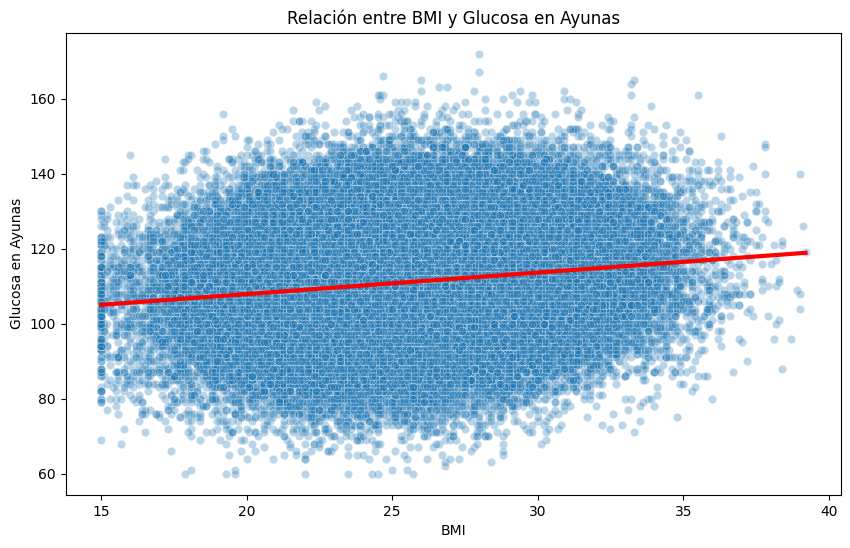

In [ ]:
# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["bmi"], y=df["glucose_fasting"], alpha=0.3)
sns.regplot(x=df["bmi"], y=df["glucose_fasting"], scatter=False, color='red', line_kws={'linewidth': 3})
plt.xlabel("BMI")
plt.ylabel("Glucosa en Ayunas")
plt.title("Relación entre BMI y Glucosa en Ayunas")
plt.show()

El gráfico evidencia una tendencia positiva aproximadamente lineal, lo que indica que, en promedio, mayores valores de BMI se asocian con mayores niveles de glucosa en ayunas. Aunque se observa una elevada dispersión, no se detectan patrones no lineales evidentes.

#### Verificación de los Supuestos de la Regresión Lineal Simple

En esta sección se evalúan de forma sistemática los supuestos del modelo de regresión lineal simple estimado mediante mínimos cuadrados ordinarios (OLS), con el objetivo de garantizar la validez de los coeficientes estimados y de la inferencia estadística asociada.

El __supuesto de independencia__ establece que los errores del modelo no deben estar correlacionados entre sí. Para evaluar este supuesto se utilizó el estadístico Durbin–Watson, el cual toma valores cercanos a 2 cuando no existe autocorrelación de los residuos.

En este modelo, el estadístico Durbin–Watson es igual a 1.995, valor muy próximo a 2, lo que sugiere ausencia de autocorrelación y confirma el cumplimiento de dicho supuesto.

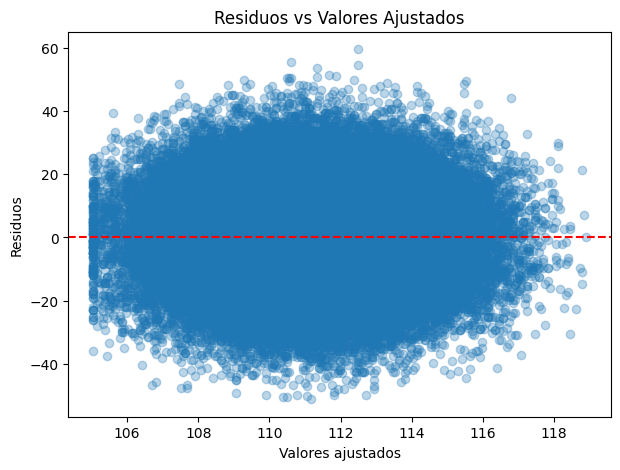

In [ ]:
# Valores ajustados y residuos
fitted_vals = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(7,5))
plt.scatter(fitted_vals, residuals, alpha=0.3)
plt.axhline(0, color = "red", linestyle="--")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores Ajustados")
plt.show()


El __supuesto de homocedasticidad__ establece que la varianza de los errores del modelo debe ser constante a lo largo de los valores ajustados de la variable dependiente. Para evaluar este supuesto se analizó el gráfico de residuos frente a los valores ajustados del modelo.

En el gráfico se observa que los residuos se distribuyen de forma aproximadamente aleatoria y simétrica alrededor de cero, manteniendo una dispersión relativamente constante en todo el rango de valores ajustados. No se identifican patrones sistemáticos ni estructuras en forma de abanico que sugieran heterocedasticidad. Por lo tanto, se concluye que el supuesto de homocedasticidad se cumple de manera razonable en el modelo estimado.

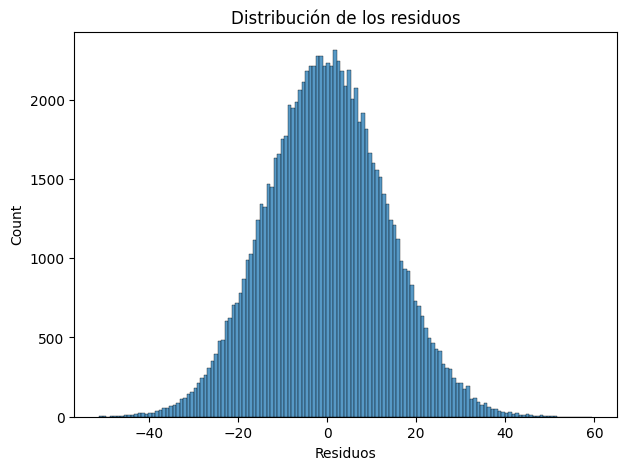

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(residuals)
plt.xlabel("Residuos")
plt.title("Distribución de los residuos")
plt.show()


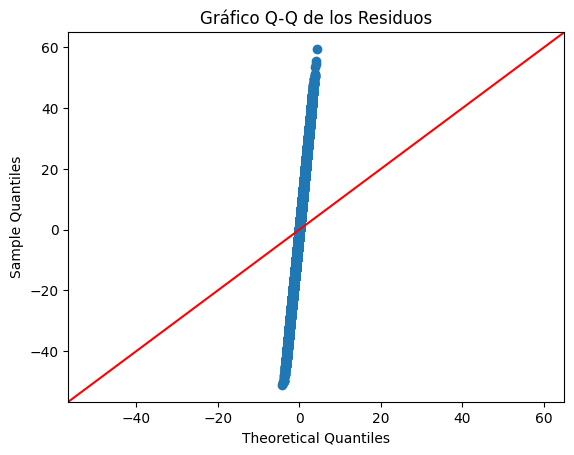

In [ ]:
sm.qqplot(residuals, line='45')
plt.title("Gráfico Q-Q de los Residuos")
plt.show()

El __supuesto de normalidad__ de los residuos fue evaluado mediante un histograma y un gráfico Q–Q. El histograma muestra una distribución aproximadamente simétrica y centrada en cero, consistente con una distribución normal. El gráfico Q–Q evidencia desviaciones respecto a la recta teórica, especialmente en las colas, lo cual es esperable dado el gran tamaño muestral (n = 97,297), ya que este tipo de gráficos se vuelve altamente sensible a pequeñas desviaciones de la normalidad. En este contexto, y apoyándose en el Teorema Central del Límite, dichas desviaciones no comprometen la validez de la inferencia estadística. Por tanto, se considera que el supuesto de normalidad de los errores se cumple de manera razonable para los fines del presente estudio.

El siguiente supuesto establece que __el valor esperado del error aleatorio es cero__ , es decir, que no existen variables omitidas correlacionadas con la variable explicativa. 

En este análisis, es razonable asumir que existen factores adicionales que influyen sobre los niveles de glucosa en ayunas, tales como la actividad física, la dieta, la predisposición genética y antecedentes clínicos. La omisión de estas variables puede explicar el bajo valor del coeficiente de determinación (R²). Por lo tanto, los resultados deben interpretarse como asociaciones estadísticas y no como efectos causales estrictos.

En este contexto, se justifica la ampliación del análisis hacia un conjunto de factores clínicos y fisiológicos que reflejan de manera más directa el estado metabólico y cardiovascular del individuo. Variables como los antecedentes familiares de diabetes, la presencia de hipertensión arterial o enfermedad cardiovascular, así como indicadores bioquímicos asociados al metabolismo lipídico y a la regulación de la insulina, han sido ampliamente vinculadas con alteraciones en la homeostasis de la glucosa.

El objetivo de este bloque es evaluar de manera conjunta la influencia de estos factores clínicos sobre los niveles de glucosa en ayunas mediante un modelo de regresión lineal múltiple. Este enfoque permite cuantificar el efecto independiente de cada variable, controlar por posibles factores de confusión y proporcionar una visión más integral del riesgo metabólico, complementando el análisis preliminar basado exclusivamente en el BMI.

### <span style="color:#3498db;">¿Qué factores clínicos influyen con mayor peso sobre la glucosa en ayunas?

In [ ]:
# Variables de antecedentes clínicos
clinical_vars = [
    "family_history_diabetes",
    "hypertension_history",
    "cardiovascular_history",
    "bmi",
    "insulin_level",
    "triglycerides",
]

# Variables dependiente e independientes
X = df[clinical_vars]
Y = df["glucose_fasting"]
# Y = df["hba1c"]

# Agregar constante
X = sm.add_constant(X)

# Ajustar modelo OLS
model_clinical = sm.OLS(Y, X).fit()

# Mostrar resultados
print(model_clinical.summary())


                            OLS Regression Results                            
Dep. Variable:        glucose_fasting   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     2806.
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        17:24:45   Log-Likelihood:            -3.8418e+05
No. Observations:               97297   AIC:                         7.684e+05
Df Residuals:                   97290   BIC:                         7.684e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Análisis del Modelo Clínico 

En este bloque se ajustó un modelo de **regresión lineal múltiple** mediante el método de **mínimos cuadrados ordinarios (OLS)** con el objetivo de evaluar la asociación conjunta entre antecedentes clínicos y fisiológicos y los niveles de glucosa en ayunas (`glucose_fasting`). A diferencia del análisis previo basado únicamente en el BMI, este modelo incorpora variables que reflejan de forma más directa el estado metabólico, cardiovascular y el riesgo hereditario de diabetes.

---

#### Especificación del modelo

El modelo estimado tiene la siguiente forma:

$$
\begin{aligned}
\text{glucose\_fasting}_i =\;& \beta_0 
+ \beta_1 \,\text{family\_history\_diabetes}_i 
+ \beta_2 \,\text{hypertension\_history}_i \\
&+ \beta_3 \,\text{cardiovascular\_history}_i
+ \beta_4 \,\text{bmi}_i
+ \beta_5 \,\text{insulin\_level}_i
+ \beta_6 \,\text{triglycerides}_i
+ \varepsilon_i
\end{aligned}
$$

donde:
- `glucose_fasting` es la variable dependiente continua,
- las variables explicativas incluyen antecedentes clínicos binarios y marcadores fisiológicos continuos,
- $\varepsilon_i$ representa el término de error aleatorio.

---

#### Calidad del ajuste del modelo

El modelo presenta un **R² ajustado de 0.147**, lo que indica que aproximadamente el **14.7% de la variabilidad en los niveles de glucosa en ayunas** es explicada por el conjunto de variables clínicas incluidas. En comparación con los modelos simples previos, este resultado refleja una **mejora sustancial en la capacidad explicativa**, lo que confirma la relevancia de los factores clínicos en el control glucémico.

El test F global es altamente significativo (p < 0.001), indicando que el modelo, en su conjunto, aporta información estadísticamente relevante.

---

#### Interpretación de los coeficientes
  
- **Antecedentes familiares de diabetes**  
  (β₁ = 11.30, p < 0.001): los individuos con historia familiar de diabetes presentan, en promedio, **11.3 mg/dL más de glucosa en ayunas** que aquellos sin dicho antecedente, manteniendo constantes el resto de las variables. Este es el efecto de mayor magnitud del modelo.

- **Hipertensión arterial**  
  (β₂ = 1.36, p < 0.001): la presencia de hipertensión se asocia con un incremento promedio de **1.36 mg/dL** en la glucosa, lo que sugiere una relación entre disfunción cardiovascular y metabolismo glucémico.

- **Antecedentes cardiovasculares**  
  (β₃ = 1.68, p < 0.001): se observa una asociación positiva y significativa, consistente con la evidencia clínica sobre el vínculo entre enfermedad cardiovascular y alteraciones metabólicas.

- **Índice de masa corporal (BMI)**  
  (β₄ = 0.46, p < 0.001): incluso tras controlar por otros factores clínicos, el BMI mantiene un efecto positivo significativo.

- **Nivel de insulina**  
  (β₅ = 0.12, p < 0.001): niveles más elevados de insulina se asocian con mayor glucosa en ayunas, lo que puede interpretarse como un indicador indirecto de resistencia a la insulina.

- **Triglicéridos**  
  (β₆ = 0.009, p < 0.001): aunque el efecto individual es pequeño, resulta estadísticamente significativo y consistente con el rol del perfil lipídico en el riesgo metabólico.

---

#### Diagnóstico del modelo y supuestos

Los estadísticos de diagnóstico indican un buen comportamiento del modelo:
- **Durbin–Watson ≈ 1.995**, lo que sugiere ausencia de autocorrelación de los residuos.
- Las pruebas de **normalidad de residuos** (Jarque–Bera) no muestran desviaciones significativas.
- El **condition number (966)** no evidencia problemas graves de multicolinealidad, lo que respalda la estabilidad de los coeficientes estimados.

Dado el gran tamaño muestral, pequeñas desviaciones de normalidad no comprometen la validez de la inferencia.

---

En conclusión, podemos afirmar que el modelo clínico muestra que los **antecedentes familiares de diabetes, la presencia de hipertensión y enfermedad cardiovascular, así como indicadores fisiológicos como el BMI, la insulina y los triglicéridos**, están significativamente asociados con los niveles de glucosa en ayunas. En conjunto, estos factores explican una proporción considerablemente mayor de la variabilidad glucémica que el BMI por sí solo.

Antes de continuar, debemos señalar que en modelos de regresión lineal múltiple es fundamental evaluar la presencia de multicolinealidad entre las variables explicativas, ya que una alta correlación entre predictores puede afectar la estabilidad de los coeficientes estimados y la validez de la inferencia.


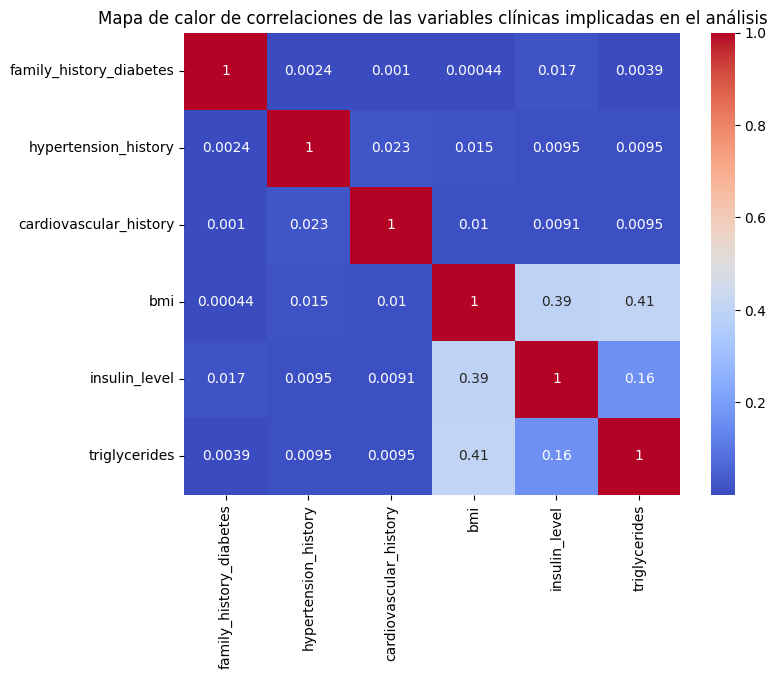

In [ ]:
corr = df[clinical_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones de las variables clínicas implicadas en el análisis')
plt.show()

Como diagnóstico, se analizó la matriz de correlación de Pearson entre las variables clínicas incluidas en el modelo. Los resultados muestran que todas las correlaciones bivariadas presentan valores absolutos inferiores a 0.41, lo que indica relaciones débiles a moderadas entre los predictores.

En consecuencia, no se identifica evidencia de multicolinealidad severa, por lo que se considera razonable asumir que las variables explicativas aportan información diferenciada al modelo.

### <span style="color:#3498db;">¿En qué medida los hábitos de vida modificables y la edad determinan los niveles de glucosa en ayunas, independientemente de los factores clínicos?

Luego de analizar la influencia de los antecedentes clínicos sobre la glucosa en ayunas, se decide explorar de manera independiente el papel de los factores de estilo de vida y la edad. Este enfoque permite aislar cómo hábitos cotidianos —como la actividad física, la alimentación, el consumo de alcohol y el tiempo frente a pantallas— junto con la edad, influyen en los niveles de glucosa, sin la interferencia de los marcadores clínicos.

La importancia de este análisis radica en que, a diferencia de los antecedentes familiares o algunos factores fisiológicos, los hábitos de vida son modificables. Comprender su impacto sobre la glucosa en ayunas puede orientar estrategias de prevención y promoción de la salud, permitiendo intervenir de manera efectiva sobre factores conductuales para reducir el riesgo metabólico y prevenir la aparición de diabetes.

El objetivo de este análisis es evaluar cuantitativamente la relación entre estas variables y la glucosa en ayunas mediante un modelo de regresión lineal múltiple, ofreciendo una perspectiva centrada en el comportamiento y estilo de vida del individuo.

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Cargar el dataset
df = pd.read_csv('Diabetes_and_LifeStyle_Dataset .csv')


# Variables de estilo de vida seleccionadas
vars = [
    "Age",
    "alcohol_consumption_per_week",
    "physical_activity_minutes_per_week",
    "diet_score",
    "screen_time_hours_per_day",
]

# Definir variables dependiente e independientes
X = df[vars]
Y = df["glucose_fasting"]

# Agregar constante
X = sm.add_constant(X)

# Ajustar modelo
model_lifestyle = sm.OLS(Y, X).fit()

# Mostrar resultados
print(model_lifestyle.summary())

                            OLS Regression Results                            
Dep. Variable:        glucose_fasting   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1838.
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        17:25:41   Log-Likelihood:            -3.8755e+05
No. Observations:               97297   AIC:                         7.751e+05
Df Residuals:                   97291   BIC:                         7.752e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### Análisis del Modelo de Estilo de Vida

El modelo estimado tiene la siguiente forma:

$$
\begin{aligned}
\text{glucose\_fasting}_i =\;& \beta_0 
+ \beta_1 \,\text{Age}_i 
+ \beta_2 \,\text{alcohol\_consumption\_per\_week}_i \\
&+ \beta_3 \,\text{physical\_activity\_minutes\_per\_week}_i
+ \beta_4 \,\text{diet\_score}_i
+ \beta_5 \,\text{screen\_time\_hours\_per\_day}_i
+ \varepsilon_i
\end{aligned}
$$

donde:
- `glucose_fasting` es la variable dependiente continua,
- las variables explicativas incluyen edad y hábitos de estilo de vida modificables,
- $\varepsilon_i$ representa el término de error aleatorio.

---

#### Calidad del ajuste del modelo

El modelo presenta un **R² ajustado de 0.086**, lo que indica que aproximadamente el **8.6% de la variabilidad en los niveles de glucosa en ayunas** es explicada por la edad y los factores de estilo de vida. Aunque la capacidad explicativa es menor que la del modelo clínico, el resultado refleja la relevancia práctica de **hábitos modificables** en el control glucémico.

El **test F global** es significativo (p < 0.001), indicando que las variables del modelo aportan información estadísticamente relevante en conjunto.

---

#### Interpretación de los coeficientes

- **Edad (β₁, positivo y significativo)**: la glucosa tiende a aumentar con la edad, aun controlando por hábitos de vida.  

- **Consumo de alcohol (β₂, positivo moderado)**: mayores niveles de consumo se asocian con glucosa más alta.  

- **Actividad física (β₃, negativo y significativo)**: mayor actividad semanal se relaciona con glucosa más baja.  

- **Puntuación de dieta (β₄, negativo y significativo)**: mejor calidad de la dieta se asocia con niveles más bajos de glucosa.  

- **Tiempo frente a la pantalla (β₅, positivo)**: mayor sedentarismo se relaciona con niveles más altos de glucosa.

---

#### Diagnóstico del modelo y supuestos

Los estadísticos de diagnóstico indican un buen comportamiento del modelo:

- **Condition number = 873**, indicando ausencia de problemas graves de multicolinealidad y estabilidad de los coeficientes.  
- La revisión de residuos no muestra desviaciones importantes de normalidad ni autocorrelación significativa, lo que respalda la validez de la inferencia.  

---

#### Conclusión

El modelo de estilo de vida muestra que **la edad y los hábitos modificables —actividad física, calidad de dieta, consumo de alcohol y sedentarismo—** están significativamente asociados con los niveles de glucosa en ayunas. Aunque explican una menor proporción de la variabilidad glucémica que los factores clínicos, estos hallazgos son **relevantes desde un enfoque preventivo**, ya que identifican áreas donde la intervención conductual podría contribuir a mantener niveles de glucosa saludables y reducir el riesgo de desarrollar diabetes.  

El signo y la significancia de los coeficientes observados son consistentes con la evidencia clínica existente y reflejan patrones esperados de riesgo metabólico, reforzando la importancia de hábitos de vida saludables en la prevención metabólica.


Matriz de correlacion de las variables independientes:

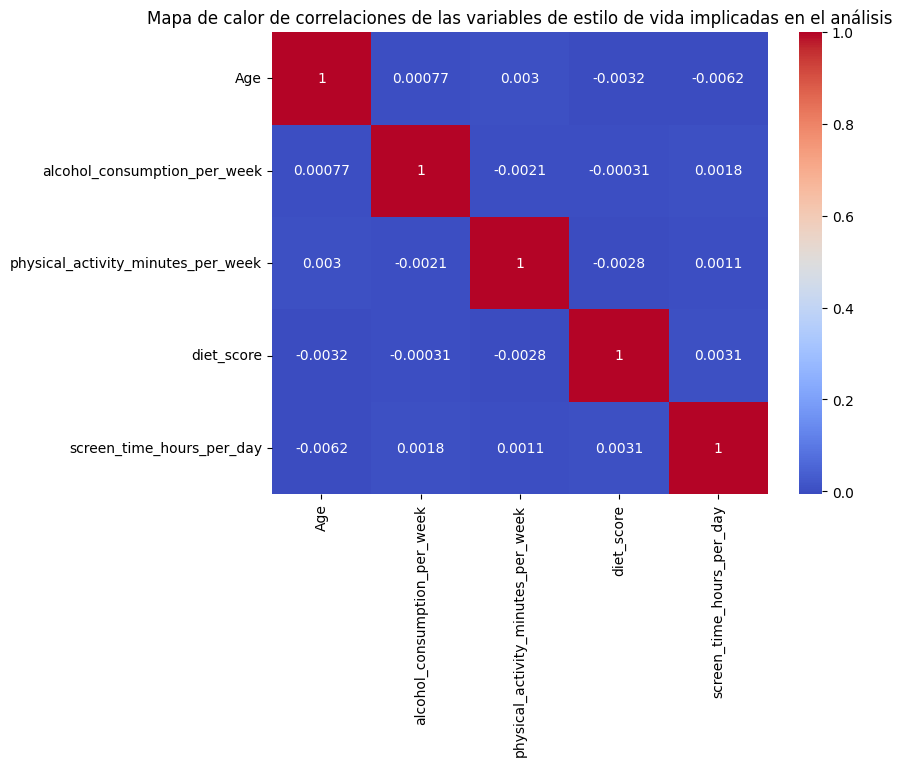

In [ ]:
vars = [
    "Age",
    "alcohol_consumption_per_week",
    "physical_activity_minutes_per_week",
    "diet_score",
    "screen_time_hours_per_day",
]

corr = df[vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones de las variables de estilo de vida implicadas en el análisis')
plt.show()


Los valores obtenidos se encuentran por debajo de los umbrales críticos comúnmente aceptados, lo que indica que no existen problemas graves de multicolinealidad. Este resultado es consistente con el valor moderado del condition number reportado en el resumen del modelo y respalda la estabilidad de los coeficientes estimados.